# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)   
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.  
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).  


1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей работает хуже, чем логистическая регрессия. 

2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

4. Сгенерировать датасет для задачи регрессии (MSE),
на котором решающее дерево работает хуже, чем линейная регрессия. 


##### Предположения моделей

Логистическая регрессия делает предположение, что объекты выборки можно разделить на классы линейной разделяющей поверхностью (в случае двумерного пространства признаков - прямой).

Метод ближайших соседей делает предположение, что объекты, находящиеся рядом, относятся к одному классу. 

Линейная регрессия делает предположение, что целевая переменная зависит от данной(ых) линейно. 

Решающее дерево предполагает, что все объекты можно разбить на группы, используя для этого пороги для признаков. Значение целевой переменной будет равно среднему значению целевой переменной объектов, попавших в ту же группу.

In [24]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import LeaveOneOut
import numpy as np

In [2]:
class Compearer():
    def __init__(self, m1, m2, X, y):
        self.m1 = m1
        self.m2 = m2
        self.X = X
        self.y = y
        
    def validate(self, metric, cv):
        score1 = cross_val_score(self.m1, self.X, self.y, cv=cv, scoring=metric)
        score2 = cross_val_score(self.m2, self.X, self.y, cv=cv, scoring=metric)
        
        if metric == 'accuracy':
            print(self.m1, metric, 'score: ', score1)
            print(self.m2, metric, 'score: ', score2)
        else:
            print(self.m1, metric, 'score: ', np.mean(score1))
            print(self.m2, metric, 'score: ', np.mean(score2))

##### 1) Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.

На данной выборке KNN будет работать плохо, потому что объекты разных классов расположены ближе друк к другу, чем объекты одного класса. Логистическая регрессия будет работать хорошо, т.к. выборка линейно разделимая.

In [3]:
X1 = list(range(1, 1000, 50)) + list(range(10, 1000, 50))
X2 = list(range(1, 1000, 50)) + list(range(1, 1000, 50))
y = [0] * (len(X1)//2) + [1] * (len(X1)//2)

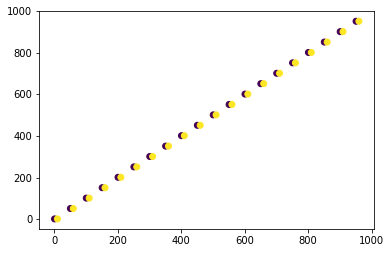

In [4]:
plt.scatter(X1, X2, c=y)

In [5]:
data_1 = pd.DataFrame({'X1': X1, 'X2': X2})

In [6]:
lgr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
C = Compearer(lgr, knn, data_1, y)

In [8]:
C.validate('accuracy', 5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) accuracy score:  [ 1.  1.  1.  1.  1.]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform') accuracy score:  [ 0.5   0.25  0.25  0.25  0.5 ]


##### 2) Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

На данной выборке LogReg будет работать плохо, т.к. невозможно линейно разделить два класса между собой. KNN будет работать хорошо (везде кроме места пересечения), т.к. объекты одного класса ближе друг к другу. В месте персечения выбор класса для объекта зависит от порядка перебора, т.к. расстояния одинаковые.

In [9]:
X1 = list(range(1, 1000, 25)) + list(range(1000, 1, -25))
X2 = list(range(1, 1000, 25)) + list(range(1, 1000, 25))
y = [0] * (len(X1) // 2) + [1] * (len(X1) // 2)

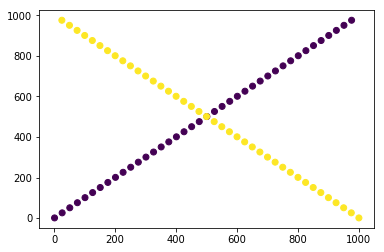

In [10]:
plt.scatter(X1, X2, c=y)

In [11]:
data_2 = pd.DataFrame({'X1': X1, 'X2': X2})

In [12]:
lgr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
C = Compearer(lgr, knn, data_2, y)
C.validate('accuracy', 5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) accuracy score:  [ 0.   0.   0.5  0.   0. ]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform') accuracy score:  [ 1.     1.     0.875  1.     1.   ]


##### 3) Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

Здесь подойдет набор данных из пункта 1. Косинусная мера близости между двумя точками - размер угла между векторами, проведенного из начала координат к этим точкам. На данном наборе евклидова мера будет работать хуже, чем косинусная, поскольку точки, расположенные на одной прямой надодятся дальше друг от друга, чем точки на двух отрезках параллельных прямых. Однако для точек, лежащих на одной прямой, по ком=синусной метрике будут ближе, чем лежащие на параллельных прямых.

In [15]:
X1 = list(range(1, 1000, 50)) + list(range(10, 1000, 50))
X2 = list(range(1, 1000, 50)) + list(range(1, 1000, 50))
y = [0] * (len(X1)//2) + [1] * (len(X1)//2)

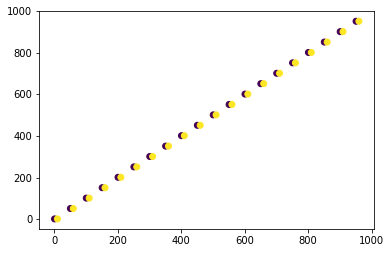

In [16]:
plt.scatter(X1, X2, c=y)

In [17]:
data_3 = pd.DataFrame({'X1': X1, 'X2': X2})

In [18]:
knn_cos = KNeighborsClassifier(n_neighbors=3, metric=cosine_similarity)
knn_euc = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [19]:
C = Compearer(knn_cos, knn_euc, data_3, y)
C.validate('accuracy', 5)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function cosine_similarity at 0x00000057FC2B9378>,
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform') accuracy score:  [ 0.   0.5  0.5  0.5  0.5]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform') accuracy score:  [ 0.5   0.25  0.25  0.25  0.5 ]


##### 4. Сгенерировать датасет для задачи регрессии (MSE), на котором решающее дерево работает хуже, чем линейная регрессия. 

На данном наборе решающее дерево будет работать плохо, т.к. при разбиении по единственному признаку для всех новых объектов, значение призака которого больше, чем у объектов в обучающей выборке, мы будем получать одинаковое значение (т.е. не сможем приблизить линейное возрастание, на графике это будет выглядеть как плато после последнего объекта). Линейная регрессия будет работать хорошо на этих данных, т.к. значения идеально подходят под ее предположение о линейной зависимости одной переменной от другой.

In [20]:
X = list(range(1, 100, 5))
y = list(range(1, 100, 5))

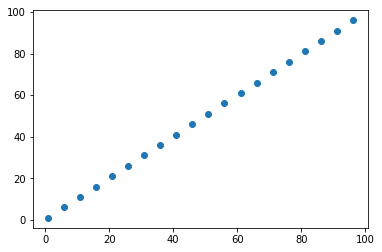

In [21]:
plt.scatter(X, y)

In [25]:
X = np.array(X).reshape((len(X),1))

In [26]:
linr = LinearRegression()
dtc = DecisionTreeClassifier()

In [27]:
loo = LeaveOneOut()

In [28]:
C = Compearer(linr, dtc, X, y)
C.validate('mean_squared_error', loo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) mean_squared_error score:  -2.21275483914e-29
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') mean_squared_error score:  -25.0
